In [2]:
#%pip install html5lib
#%pip install webdriver-manager
#%pip install selenium


In [3]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from webdriver_manager.chrome import ChromeDriverManager




print(plt.style.available)
%matplotlib inline
driver = webdriver.Chrome()

url='https://guba.eastmoney.com/list,hk01810.html'
driver.get(url)
driver.find_element(By.XPATH, '/html/body/div[5]/img[1]').click()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
try:
    next_page=driver.find_element('class name','nextp')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")
table =driver.find_element('class name','listbody')
table.text
# Extract table rows
rows = table.find_elements(By.TAG_NAME, 'tr')

# Initialize lists to store data
data = []

# Loop through rows and extract data
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if cells:  # Skip rows without data (e.g., headers)
        row_data = [cell.text for cell in cells]
        data.append(row_data)

df = pd.DataFrame(data)


In [5]:
df

,0,1,2,3,4
0,624,1,$小米集团-W(HK|01810)$,股友p5106V1133,10-04 23:24
1,192,0,$小米集团-W(HK|01810)$,今天廊坊涨停了吗,10-04 21:04
2,2491,24,资讯“小米汽车突然自己开走”？小米通报调查结果：是一台iPhone 15 Pro Max发出...,小米集团-W资讯,10-04 21:03
3,8506,54,资讯“比劳斯莱斯贵也要订”！年轻人结婚 想试试新式豪华,小米集团-W资讯,10-04 20:58
4,268,3,为啥港股通国庆休市，10.2和10.3港股通还有持仓变化啊,深深呈,10-04 20:56
...,...,...,...,...,...
75,3000,67,问界新M7大定的加速度，远超M8，好好捂住，四季度赛力斯的业绩将非常炸裂！,神爱钱6,10-04 08:40
76,1.1万,223,资讯“小米超强钢”被标注为项目名称 小米汽车回应 罗永浩：小字标注是行业普遍陋习,小米集团-W资讯,10-04 08:19
77,322,2,$杂粮真的是死性不改，太差了,膏药猴,10-04 08:18
78,261,0,小米股价怎么就是不去，连前高都过不了，就范四不好比人家A1就是好,股友yID66S,10-04 07:45


In [6]:
driver.get(url)
string_list = []
i = 0
Num_Pages = 20

while i < Num_Pages:
    table = driver.find_element('class name', 'listbody')
    string_list.append(table.get_attribute('outerHTML'))  # Collect raw HTML
    try:
        next_page = driver.find_element('class name', 'nextp')
        next_page.click()
        i += 1
    except NoSuchElementException:
        break


In [5]:


# Data processing outside the loop
all_data = []
for html in string_list:
    # Wrap tbody fragment with table tags
    html_table = f"<table>{html}</table>"
    temp_table = pd.read_html(StringIO(html_table)
                              , flavor='html5lib')[0]
    all_data.append(temp_table)

# Combine all dataframes
df_full = pd.concat(all_data, ignore_index=True)


In [6]:
df_full

,0,1,2,3,4
0,5969,78,资讯小米汽车突然自行开走 小米公司：系用户手机发出泊车指令,小米集团-W资讯,10-05 11:02
1,1.3万,80,科技公司也得营销,跌宕12载,10-05 11:28
2,1.5万,730,为什么说小米目前的生意方向令人疑惑且不齿？,基民588913c6d5,10-04 19:30
3,6.2万,378,小米雷军泪洒演讲台：5年砸2000亿死磕芯片造车，必将改写中国科技格局！,禅股匠,10-03 22:59
4,396,13,都知道是伪君子在黑真君子，可谁也没有办法！咋整？,菩萨低眉,10-05 11:24
...,...,...,...,...,...
1594,95,1,指数都撑不起来下午五十附近见,稳稳得超人,09-30 11:15
1595,93,0,了,坐看雲來時,09-30 11:15
1596,106,6,猴子们颤抖吧,股友66op095696,09-30 11:15
1597,97,0,他娘的衰票天天看着你那个拉几走势真的心累想吐，外面都拉冒烟了，你个拉几的芯片呢？,财神ye保佑我888,09-30 11:12


In [7]:
driver.quit()

In [8]:
df_full.columns=['阅读',
'评论',
'标题',
'作者',
'最后更新']

In [9]:
df_full.head()

,阅读,评论,标题,作者,最后更新
0,5969,78,资讯小米汽车突然自行开走 小米公司：系用户手机发出泊车指令,小米集团-W资讯,10-05 11:02
1,1.3万,80,科技公司也得营销,跌宕12载,10-05 11:28
2,1.5万,730,为什么说小米目前的生意方向令人疑惑且不齿？,基民588913c6d5,10-04 19:30
3,6.2万,378,小米雷军泪洒演讲台：5年砸2000亿死磕芯片造车，必将改写中国科技格局！,禅股匠,10-03 22:59
4,396,13,都知道是伪君子在黑真君子，可谁也没有办法！咋整？,菩萨低眉,10-05 11:24


In [10]:
def chinese_to_number(s):
	if isinstance(s, str) and '万' in s:
		return float(s.replace('万', '')) * 10000
	try:
		return float(s)
	except ValueError:
		return pd.NA

df_full['阅读'] = df_full['阅读'].apply(chinese_to_number)
df_full['评论'] = df_full['评论'].apply(chinese_to_number)

In [11]:
df_full.describe()

,阅读,评论
count,1599.000000,1599.000000
mean,1246.180113,10.339587
std,7065.531000,53.201618
min,18.000000,0.000000
25%,217.000000,0.000000
50%,274.000000,2.000000
75%,443.500000,6.000000
max,163000.000000,1075.000000


In [16]:
df_full.to_parquet("df_full.parquet", index=False)

In [7]:
df_full = pd.read_parquet("df_full.parquet")

In [8]:
import torch
# Check if CUDA (GPU support) is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#model_id="IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment"
model_id="C:\\Users\\Leige\\models\\fengshenbang\\Erlangshen-RoBERTa-330M-Sentiment"
# model_id=f"/home/hmai/models/models--IDEA-CCNL--Erlangshen-Roberta-330M-Sentiment/snapshots/7005a53278f557cb27010fb08bb56a88b92173a9"
tokenizer = AutoTokenizer.from_pretrained(model_id, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(
    model_id, local_files_only=True).to(device)
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    # Move input tensors to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).item()
    # 0: negative, 1: positive
    return  probs

df_full['情感_prob'] = df_full['标题'].apply(get_sentiment)
df_full['情感_得分'] = df_full['情感_prob'].apply(
    lambda x: round(float(x[0][1].cpu().numpy()), 3)
)
df_full['情感'] = df_full['情感_prob'].apply(lambda x: 
            'negative' if torch.argmax(x).item() == 0 else 'positive')
df_full['情感'].value_counts()

Using device: cuda


情感
positive    1867
negative    1787
Name: count, dtype: int64

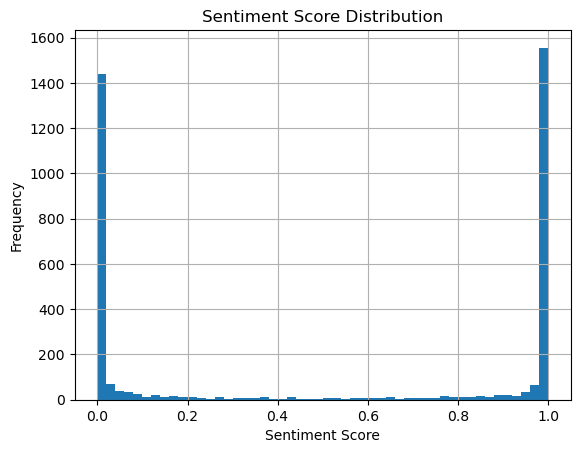

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df_full['情感_得分'].hist(bins=50)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

In [15]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 1024, padding_idx=1)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1